In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Setup completed!')

Setup completed!


In [2]:
df = pd.read_csv('../data/breast-cancer-cleaned.csv', index_col=[0])

In [3]:
df.drop(df[df['node-caps'] == '?'].index, inplace=True)
df.drop(df[df['breast-quad'] == '?'].index, inplace=True)
df.loc[df['irradiat'] == 'ye', 'irradiat'] = 'yes'
df.loc[df['irradiat'] == 'y', 'irradiat'] = 'yes'

In [4]:
df.dropna(axis=0, how='any', inplace=True)

In [5]:
df.to_csv('../data/breast-cancer-final.csv')

In [6]:
df = pd.read_csv('../data/breast-cancer-final.csv')

## Dataset information:
This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the ML literature.

This dataset includes 201 instances of one class and 85 instances of another class. The instances are described by 9 attributes, some of which are linear and some are nominal.

## Atributes information:
- ``menopause`` (nominal): the time that marks the end of a person's menstrual cycle.
- ``age`` (range): the age of the patient.
- ``tumor-size`` (in mm) (range): the size of the tumor in the patient.
- ``inv-nodes`` (range): the number of axillary lymph nodes that contain metastatic breast cancer visible on histological examination.
- ``node-caps`` (binary): 
- ``deg-malig`` (numerical): the histological grade of the tumor. Tumors that a grade 1 predominantly consist of cells that, while neoplastic, retain many of their usual characteristics. Grade 3 tumors predominately consist of cells that are highly abnormal.
- ``breast`` (nominal): the side of breast that the patient has had the most malignant tumor, may occur in either breast.
- ``breast-quad`` (nominal): the quadrant of the breast that the patient has had the most malignant tumor.
- ``irradiate`` (binary): whether the patient has had radiation therapy to destroy cancer cells.

# Data visualization

In [7]:
range_attributes = ['age', 'tumor-size', 'inv-nodes']
nominal_attributes = ['menopause', 'node-caps', 'breast', 'breast-quad', 'irradiat']
numerical_attributes = 'def-malig'

In [8]:
def draw_count_plot(data: pd.DataFrame, attributes):
    for attribute in attributes:
        if data[attribute].nunique() > 7:
            sns.countplot(data=data, y=attribute)
        else:
            sns.countplot(data=data, x=attribute)
        plt.show()

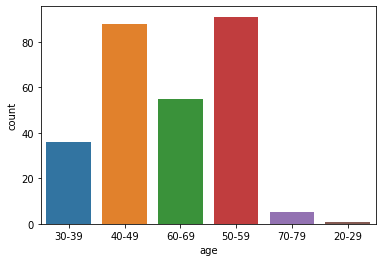

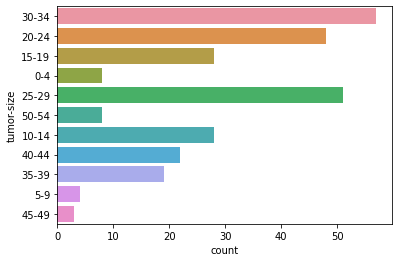

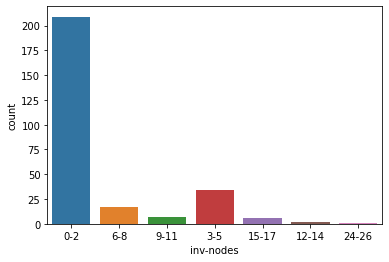

In [9]:
draw_count_plot(df, range_attributes)

## Insights
- The age range of 20-29 has the least case of breast cancer
- The age range of 40-49, 50-59 have the most case of breast cancer
- The tumor size range of 25-29, 30-34 mm occur in the most case of breast cancer
- There's not a lot of cases that have too large tumor size and too little tumor size
- 0-2 range of axillary lymph nodes has the most case of breast cancer. Whereas, 24-26 range appears so little

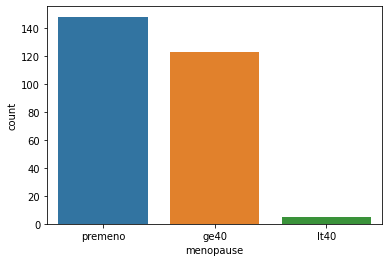

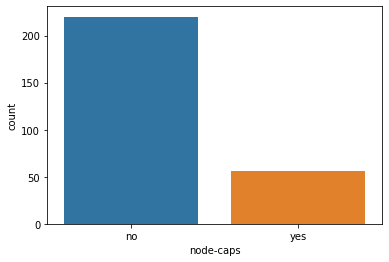

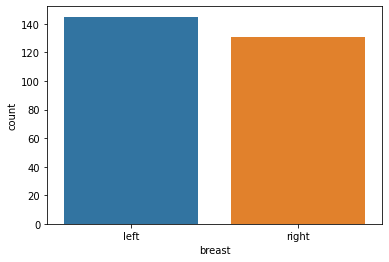

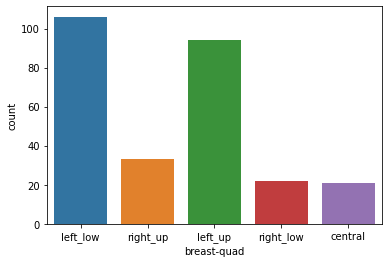

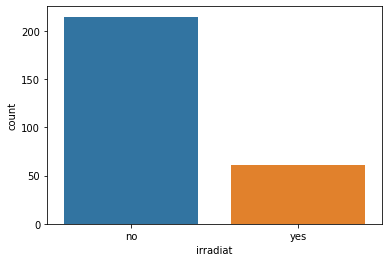

In [10]:
draw_count_plot(df, nominal_attributes)

## Insights
- ``lt40`` has so little appearance -> imbalanced dataset
- what is ``breast-quad``, ``node-caps`` with the values of ``?``?

<AxesSubplot:xlabel='def-malig', ylabel='count'>

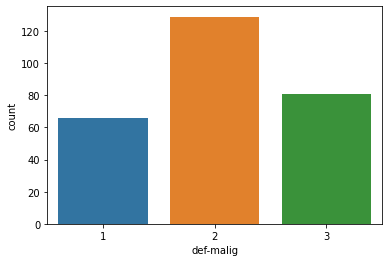

In [11]:
sns.countplot(data=df, x='def-malig')

<AxesSubplot:xlabel='class', ylabel='count'>

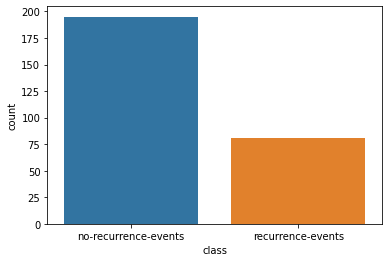

In [12]:
sns.countplot(data=df, x='class')

## Insights
- The most cases is that breast cancer not coming back again

In [13]:
def draw_comparison(attributes):
    for attribute in attributes:
        sns.countplot(data=df, x=attribute, hue='class')
        plt.show()

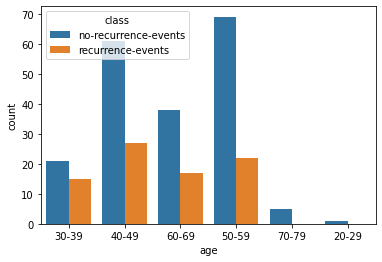

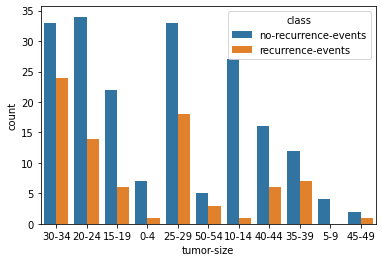

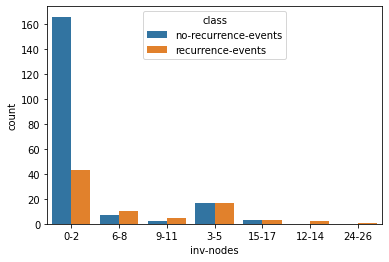

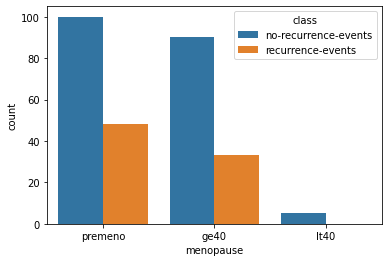

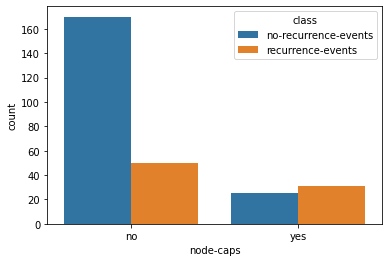

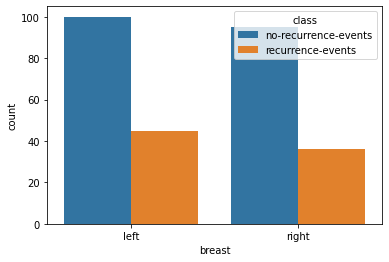

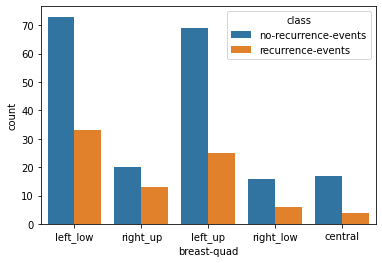

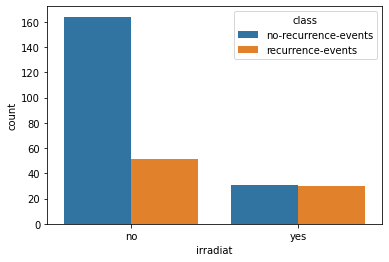

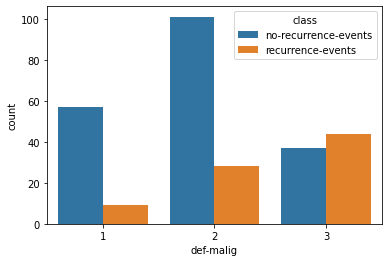

In [14]:
draw_comparison(range_attributes)
draw_comparison(nominal_attributes)
draw_comparison(['def-malig'])

## Insights
After quick glance, most breast cancer cases are not coming back again.